# Method of characteristics

The method of characteristics is a numerical approach to modeling two-dimensional supersonic flow. (It can also be extended to axisymmetric and three-dimensional flows.)

In [1]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

# these lines are only for helping improve the display
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi']= 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['mathtext.fontset'] = 'cm'

We start with the two-dimensional, steady, velocity potential equation, which applies to irrotational and adiabatic flows:

$$
\left( 1 - \frac{\Phi_x^2}{a^2} \right) \Phi_{xx} + \left( 1 - \frac{\Phi_y^2}{a^2} \right) \Phi_{yy} - \frac{2 \Phi_x \Phi_y}{a^2} \Phi_{xy} = 0 \;,
$$ (eq_velocity_potential)

where $\Phi = f(x,y)$ is the velocity potential function, subscripts of $x$ and $y$ represent partial derivatives, and $a$ is the local speed of sound.
The velocity potential is related to velocity via

$$
\Phi_x = \frac{\partial \Phi}{\partial x} = u \;, \quad \Phi_y = \frac{\partial \Phi}{\partial y} = v \;,
$$

where the velocity vector is $ \mathbf{V} (x,y) = u \mathbf{\hat{i}} + v \mathbf{\hat{j}} $.

Since the partial derivatives of the velocity potential are also functions of position—in other words, $\Phi_x = f(x,y)$ and $\Phi_y = g(x,y)$—we can take exact differentials of them:

\begin{gather*}
d \Phi_x = \frac{\partial \Phi_x}{\partial x} dx + \frac{\partial \Phi_x}{\partial y} dy \\
d \Phi_y = \frac{\partial \Phi_y}{\partial x} dx + \frac{\partial \Phi_y}{\partial y} dy \;.
\end{gather*}

Expressing these using velocity components, we can simplify to

$$
\Phi_{xx} dx + \Phi_{xy} dy = du
$$ (eq_differential_u)

$$
\Phi_{xy} dx + \Phi_{yy} dy = dv
$$ (eq_differential_v)

If we then rewrite Equation {eq}`eq_velocity_potential` using the velocity components:

$$
\left( 1 - \frac{u^2}{a^2} \right) \Phi_{xx} + \left( 1 - \frac{v^2}{a^2} \right) \Phi_{yy} - \frac{2 u v}{a^2} \Phi_{xy} = 0 \;,
$$ (eq_potential_components)

Now, with Equations {eq}`eq_differential_u`, {eq}`eq_differential_v`, and {eq}`eq_potential_components`, we have a complete linear system of equations
for solving $ \mathbf{\Phi} = \left[ \Phi_{xx}, \Phi_{xy}, \Phi_{yy} \right] $.

These unknowns are solveable using Cramer's rule!
For example, we can solve for $\Phi_{xy}$:

$$
\Phi_{xy} = \frac{\begin{vmatrix}
1 - \frac{u^2}{a^2} & 0 & 1 - \frac{v^2}{a^2} \\
dx & du & 0 \\
0 & dy & dy 
\end{vmatrix}}{\begin{vmatrix}
1 - \frac{u^2}{a^2} & -\frac{2uv}{a^2} & 1 - \frac{v^2}{a^2} \\
dx & dy & 0 \\
0 & dx & dy 
\end{vmatrix}} = \frac{N}{D}
$$

At a particular location in space, $\Phi_{xy}$ has a specific value, 
and general choices of $dx$ and $dy$ point away from this location.
Along the line formed by $dx$ and $dy$, the velocity changes 
with particular $du$ and $dv$. Regardless of the choice of this line,
the associated values of change in velocity will ensure that $\Phi_{xy}$ remains constant.

:::{figure-md} fig-streamline
<img src="../images/streamline.*" alt="Streamline geometry" class="bg-white mb-1" width="400px">

Geometry of a streamline.
:::

{numref}`Figure {number} <fig-streamline>` shows the geometry of a streamline, with $dx$ and $dy$ directed away from point A, as well as the initial velocity $V$ and components $du$ and $dv$.

## Characteristic lines

However, a particular line in space, given by particular values of 
$dx$ and $dy$, leads to $D = 0$. Since we know that $\Phi_{xy}$ cannot physically 
be infinite at this location, then $N = 0$ to keep $\Phi_{xy}$ finite:

$$
\Phi_{xy} = \frac{\partial u}{\partial y} = \frac{\partial v}{\partial x} = \frac{N}{D} = \frac{0}{0} \;.
$$

Or, the velocity derivatives are indeterminate in the directions created by $dx$ and $dy$.
These lines in space are the **characteristic lines**, where the derivatives of velocity are indeterminate.
We now have equations we can use to create these lines.

Setting $D = 0$ leads to 

\begin{gather*}
\left(1 - \frac{u^2}{a^2} \right) (dy)^2 + \frac{2uv}{a^2} dx dy + \left(1 - \frac{v^2}{a^2} \right) (dx)^2 = 0 \\
\left(1 - \frac{u^2}{a^2} \right) \left(\frac{dy}{dx} \right)_{\text{char}}^2 + \frac{2uv}{a^2} \left(\frac{dy}{dx} \right)_{\text{char}} + \left(1 - \frac{v^2}{a^2} \right) = 0 \;,
\end{gather*}

where $ \left( \frac{dy}{dx} \right)_{\text{char}}$ gives the slope of the characteristic line.
We can solve this quadratic equation to get 

$$
\left( \frac{dy}{dx} \right)_{\text{char}} = \frac{-\frac{uv}{a^2} \pm \sqrt{ \frac{u^2+v^2}{a^2} - 1}}{1 - \frac{u^2}{a^2}} \;.
$$ (eq_characteristic_line_full)

Equation {eq}`eq_characteristic_line_full` describes the slope of the characteristic line in space; if we focus on supersonic flows (where $ \frac{u^2 + v^2}{a^2} = M^2 > 1 $),
there are two real solutions to this equation.

Since $ u = V \cos \theta $ and $ v = V \sin \theta $, we can simplify the slope to

$$
\left( \frac{dy}{dx} \right)_{\text{char}} = \tan \left( \theta \mp \mu \right) \;.
$$ (eq_characteristic_line)

In other words, there are **two characteristic lines** passing through any point, which are also Mach lines. The left-running $ \theta + \mu $ line is the $C_{+}$ characteristic,
while the right-running $ \theta - \mu $ line is the $C_{-}$ characteristic.

## Compatibility equations

We now can get compatibility equations for finding how the flow velocity magnitude and direction relate along the characteristic lines.

Along a characteristic line, where $D = 0$, we can set $N = 0$, to get

\begin{gather*}
\left(1 - \frac{u^2}{a^2} \right) du dy + \left(1 - \frac{v^2}{a^2} \right) dx dv = 0 \\
\frac{dv}{du} = \frac{-\left( 1 - \frac{u^2}{a^2}\right)}{1 - \frac{v^2}{a^2}} \frac{dy}{dx} \;.
\end{gather*}

By recognizing that $\frac{dy}{dx} = \left(\frac{dy}{dx}\right)_{\text{char}}$, and incorporating Equation {eq}`eq_characteristic_line`, we can get

$$
d\theta = \mp \sqrt{M^2 - 1} \frac{dV}{V} \;.
$$ (eq_compatibility)

Equation {eq}`eq_compatibility` describes how the flow changes along characteristic lines, relating changes in direction ($\theta$) to changes in magnitude ($V$).
Integrating this equation actually gives the Prandtl–Meyer function $\nu(M)$, 
and we can obtain algebraic compatibility equations:

$$ \theta + \nu(M) = \text{const} = K_{-} \quad \text{(along } C_{-} \text{ line)} $$ (eq_compatibility_minus)

$$ \theta - \nu(M) = \text{const} = K_{+} \quad \text{(along } C_{+} \text{ line)} \;, $$ (eq_compatibility_plus)

where $K_{-}$ and $K_{+}$ are constants along the $C_{-}$ and $C_{+}$ characteristic lines, respectively, and the Prandtl–Meyer function is

$$
\nu = \left( \frac{\gamma+1}{\gamma-1} \right)^{1/2} \tan^{-1} \left[ \frac{\gamma-1}{\gamma+1} \left( M^2 - 1 \right) \right]^{1/2} - \tan^{-1} \left( M^2 - 1\right)^{1/2} \;.
$$ (eq_prandtl_meyer)

## Unit processes

We now have the tools to apply the method of characteristics to calculate how supersonic flow varies in a particular domain. The ways we apply these equations in specific situations are called **unit processes**.

### Internal flow

:::{figure-md} fig-internal
<img src="../images/characteristics-internal.*" alt="Internal flow unit process" class="bg-white mb-1" width="400px">

Internal flow unit process, with two characteristic lines intersecting to form a third point.
:::

{numref}`Figure {number} <fig-internal>` shows two characteristic lines, passing through points 1 and 2 where we know the flow conditions, intersecting at point 3.

Since we know the conditions at point 1, we know $\nu_1$ and $\theta_1$, and so we know the constant that holds along the entire $C_{-}$ line:

$$ \theta_1 + \nu_1 = (K_{-})_1 \;, $$

and similarly since we know the conditions at point 2, we know the constant that holds along the $C_{+}$ line:

$$ \theta_2 - \nu_2 = (K_{+})_2 \;. $$

The constants associated with both characteristic lines apply at point 3, and so from Equations {eq}`eq_compatibility_minus` and {eq}`eq_compatibility_plus` we have

\begin{gather*}
\theta_3 + \nu_3 = (K_{-})_3 = (K_{-})_1 \\
\theta_3 - \nu_3 = (K_{+})_3 = (K_{+})_2 \;,
\end{gather*}

which we can solve for the unknown values at point 3:

$$ \theta_3 = \frac{1}{2} \left[ (K_{-})_1 + (K_{+})_2 \right] $$ (eq_theta_3)

$$ \nu_3 = \frac{1}{2} \left[ (K_{-})_1 - (K_{+})_2 \right] \;. $$ (eq_nu_3)

Once we have $\nu_3$, we can solve for $M_3$ using the Prandtl–Meyer function,
and from that determine other properties such as pressure, temperature, and density via 
isentropic flow relations.

To actually determine the location of point 3, we can approximate that the characteristic lines are straight lines between the two points, and use the average slope based on the angles at the points.
In other words, the $C_{-}$ characteristic line connecting points 1 and 3 has the average slope

$$ \frac{1}{2} \left( \theta_1 + \theta_3 \right) - \frac{1}{2} \left( \mu_1 + \mu_3 \right) $$

and the $C_{+}$ characteristic line connecting points 2 and 3 has the average slope 

$$ \frac{1}{2} \left( \theta_2 + \theta_3 \right) + \frac{1}{2} \left( \mu_2 + \mu_3 \right) \;. $$

Using the known coordinates of points 1 and 2, we can use the intersection of the two characteristic lines to find the location of point 3:

\begin{gather*}
\left(\frac{dy}{dx}\right)_{-} = \frac{y_3 - y_1}{x_3 - x_1} \\
\left(\frac{dy}{dx}\right)_{+} = \frac{y_3 - y_2}{x_3 - x_2} \;,
\end{gather*}

which we can solve to get

$$ x_3 = \left[ y_2 - y_1 - x_2 \left(\frac{dy}{dx}\right)_{+} + x_1 \left(\frac{dy}{dx}\right)_{-} \right] \left[\left(\frac{dy}{dx}\right)_{-} - \left(\frac{dy}{dx}\right)_{+} \right]^{-1} $$ (eq_x3)

$$ y_3 = y_1 + (x_3 - x_1) \left(\frac{dy}{dx}\right)_{-} $$ (eq_y3)



#### Example

Consider two points in a supersonic flow of air, both with Mach number of 2 and right above each other (i.e., $\Delta x = 0$ between the points). Point 2 is along a line of symmetry and so the flow direction is horizontal. Point 1 is 0.25 above, and $\theta_1 = 4°$. Find the properties at and location of point 3.

In [130]:
def get_mach_angle(mach):
    '''Returns Mach angle'''
    return np.arcsin(1.0 / mach)

def get_prandtl_meyer(mach, gamma=1.4):
    '''Evaluate Prandtl-Meyer function at given Mach number.
    
    Defined as the angle from the flow direction where Mach = 1 through which the 
    flow turned isentropically reaches the specified Mach number.
    '''
    return (
        np.sqrt((gamma + 1) / (gamma - 1)) *
        np.arctan(np.sqrt((gamma - 1)*(mach**2 - 1)/(gamma + 1))) -
        np.arctan(np.sqrt(mach**2 - 1))
        )

def solve_prandtl_meyer(mach, nu, gamma=1.4):
    '''Solve for unknown Mach number, given Prandtl-Meyer function (in radians).'''
    return (nu - get_prandtl_meyer(mach, gamma))

def get_reference_area(mach, gamma=1.4):
    '''Calculate reference area ratio'''
    return ((1.0/mach) * ((1 + 0.5*(gamma-1)*mach**2) / 
            ((gamma + 1)/2))**((gamma+1) / (2*(gamma-1)))
            )

def solve_mach_area(mach, area_ratio, gamma=1.4):
    '''Used to find Mach number for given reference area ratio and gamma'''
    return (area_ratio - get_reference_area(mach, gamma))

M_3 =  2.073
θ_3 =  2.000°


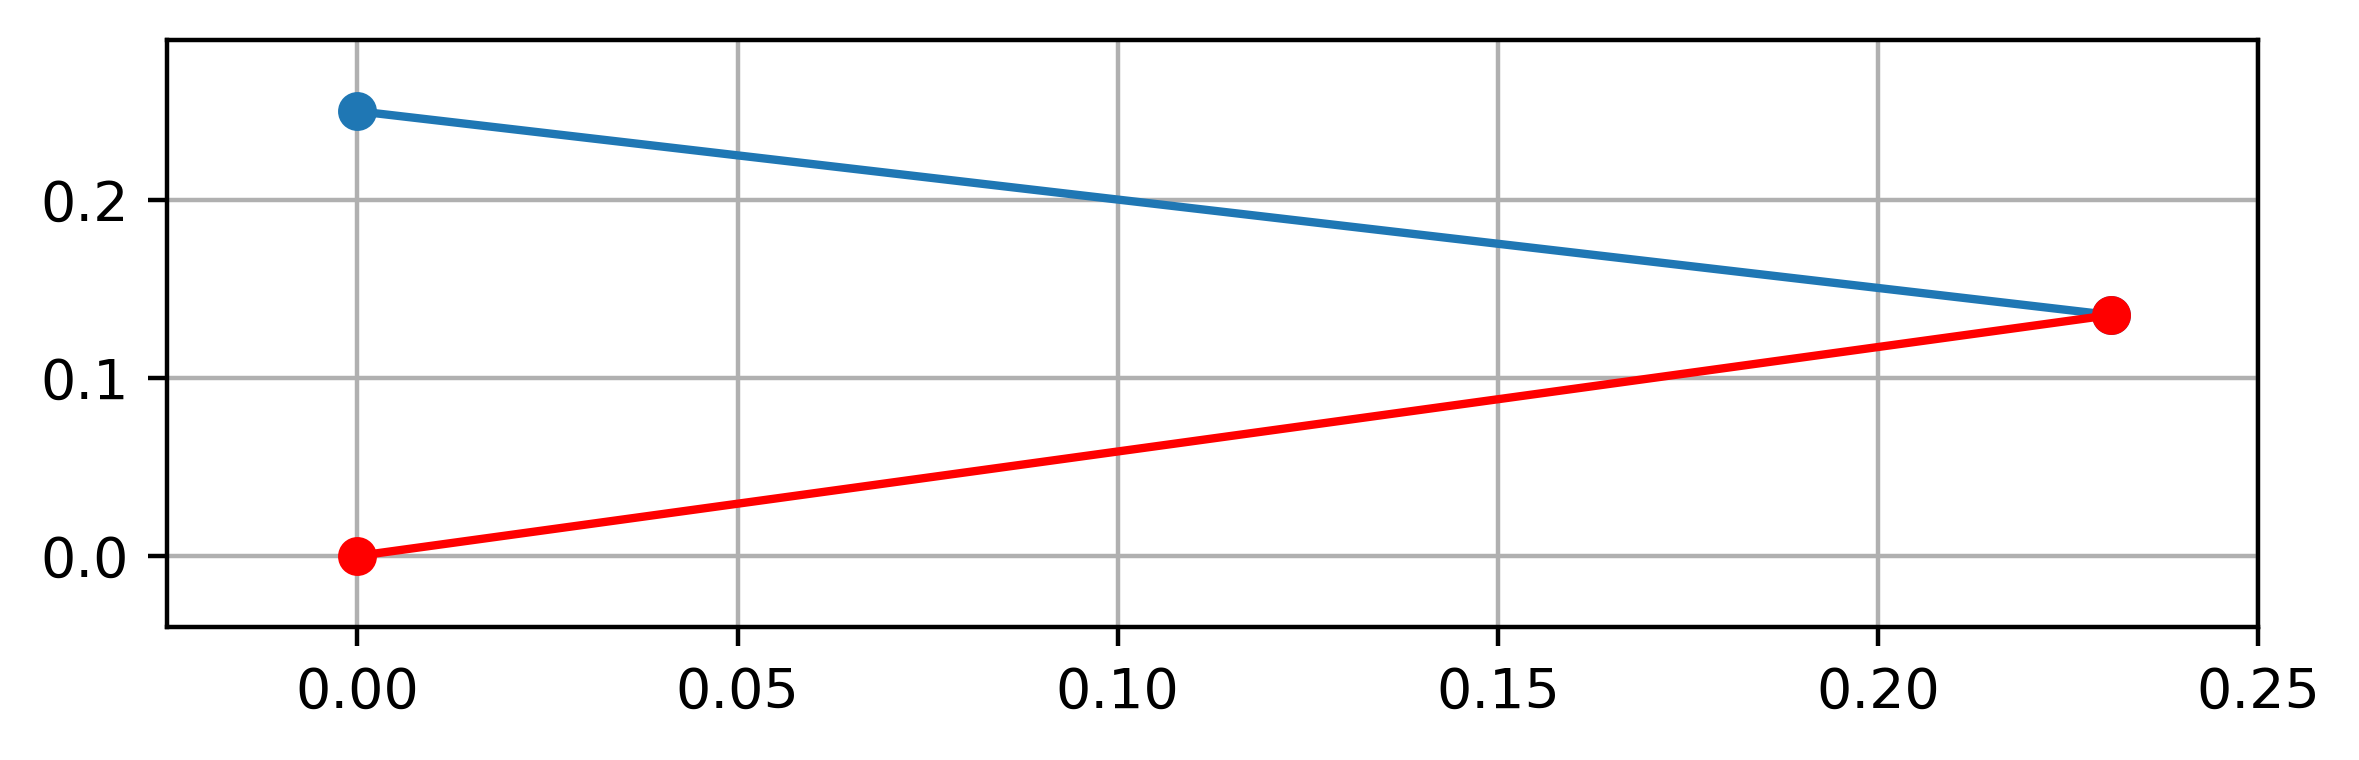

In [174]:
gamma = 1.4
M_1 = 2.0
theta_1 = 4 * np.pi/180
x1 = 0
y1 = 0.25

M_2 = 2.0
theta_2 = 0
x2 = 0
y2 = 0

nu_1 = get_prandtl_meyer(M_1, gamma)
nu_2 = get_prandtl_meyer(M_2, gamma)

K_minus = theta_1 + nu_1
K_plus = theta_2 - nu_2

theta_3 = 0.5 * (K_minus + K_plus)
nu_3 = 0.5 * (K_minus - K_plus)

root = root_scalar(solve_prandtl_meyer, x0=2.0, x1=2.5, args=(nu_3, gamma))
M_3 = root.root

print(f'M_3 = {M_3: .3f}')
print(f'θ_3 = {theta_3 * 180/np.pi: .3f}°')

dydx_minus = np.tan(
    0.5*(theta_1+theta_3) - 0.5*(get_mach_angle(M_1) + get_mach_angle(M_3))
    )
dydx_plus = np.tan(
    0.5*(theta_2+theta_3) + 0.5*(get_mach_angle(M_2) + get_mach_angle(M_3))
    )

x3 = (y2 - y1 - x2*dydx_plus + x1*dydx_minus) / (dydx_minus - dydx_plus)
y3 = y1 + (x3 - x1) * dydx_minus

plt.subplots(figsize=(6, 2))

plt.plot([x1, x3], [y1, y3], '-o')
plt.plot([x2, x3], [y2, y3], '-or')

plt.xlim([-0.025, 0.25])
plt.ylim([-0.04, 0.29])
plt.grid(True)
plt.tight_layout()
plt.show()

We can see the characteristic lines and grid points where we have the flow properties.

In general, the characteristic lines will be curved, but we can approximate the lines as straight between grid points.

### Wall point

:::{figure-md} fig-wall-point
<img src="../images/characteristics-wall.*" alt="Wall point unit process" class="bg-white mb-1" width="400px">

Wall point unit process, with one characteristic line intersecting with a point on a solid wall.
:::

{numref}`Figure {number} <fig-wall-point>` shows a characteristic line, passing through point 4 and intersecting with a solid wall at point 5.

Since the flow properties are known at point 4, we know $K_{-}$ for the $C_{-}$ characteristic line, which is the same at point 5:

$$ (K_{-})_4 = \theta_4 + \nu_4 = (K_{-})_5 = \theta_5 + \nu_5 \;. $$

Since we know the shape of the wall, and the flow must be tangent to the wall,
we know $\theta_5$, and so we can solve for $\nu_5$:

$$ \nu_5 = \nu_4 + \theta_4 - \theta_5 $$

#### Example

Below a diverging-channel wall inclined at 10°, the Mach number of a horizontal flow of air is 2.0. This grid point (1) is located 0.2 below the wall, as {numref}`Figure {number} <fig-characteristics-wall-example>` shows. 
Find the conditions at the wall, at grid point 2.

:::{figure-md} fig-characteristics-wall-example
<img src="../images/characteristics-wall-example.*" alt="Characteristic grid near a wall" class="bg-white mb-1" width="400px">

Grid point and characteristic line intersecting a wall.
:::

We know $M_1 = 2$ and $\theta_1 = 0°$, and $\theta_2 = 10°$. Since the grid point is located below the wall, points 1 and 2 are connected by a $C_{+}$ characteristic line, where

$$ (K_{+})_1 = \theta_1 - \nu_1 = (K_{+})_2 = \theta_2 - \nu_2 \;, $$

so we can solve for $\nu_2$:

$$ \nu_2 = \nu_1 + \theta_2 - \theta_1 \;. $$

In [175]:
gamma = 1.4
M_1 = 2
theta_1 = 0

nu_1 = get_prandtl_meyer(M_1, gamma)

theta_2 = 10 * np.pi/180
nu_2 = nu_1 + theta_2 - theta_1
root = root_scalar(solve_prandtl_meyer, x0=2.0, x1=2.5, args=(nu_2, gamma))
M_2 = root.root

print(f'M_2 = {M_2: .3f}')

M_2 =  2.385


To find the location of wall grid point 2 relative to flow grid point 1, we can consider that there is a point 0 located directly above point 1. We know the slope of the wall, and therefore we can use geometry to determine the location of the new point:

$$ \left(\frac{dy}{dx}\right)_{0-2} = \tan \theta_2 = \frac{y_2 - y_0}{x_2 - x_0} $$

$$ \left(\frac{dy}{dx}\right)_{C_{+}} = \tan (\theta_1 + \mu_1) = \frac{y_2 - y_1}{x_2 - x_1} $$

These equations can be solved similarly to how we got Equations {eq}`eq_x3` and {eq}`eq_y3` before:

$$ x_2 = \left[ y_0 - y_1 - x_0 \left(\frac{dy}{dx}\right)_{0-2} + x_1 \left(\frac{dy}{dx}\right)_{+} \right] \left[\left(\frac{dy}{dx}\right)_{+} - \left(\frac{dy}{dx}\right)_{0-2} \right]^{-1} $$

$$ y_2 = y_0 + (x_2 - x_0) \left(\frac{dy}{dx}\right)_{0-2} = y_0 + (x_2 - x_0) \tan \theta_2 $$

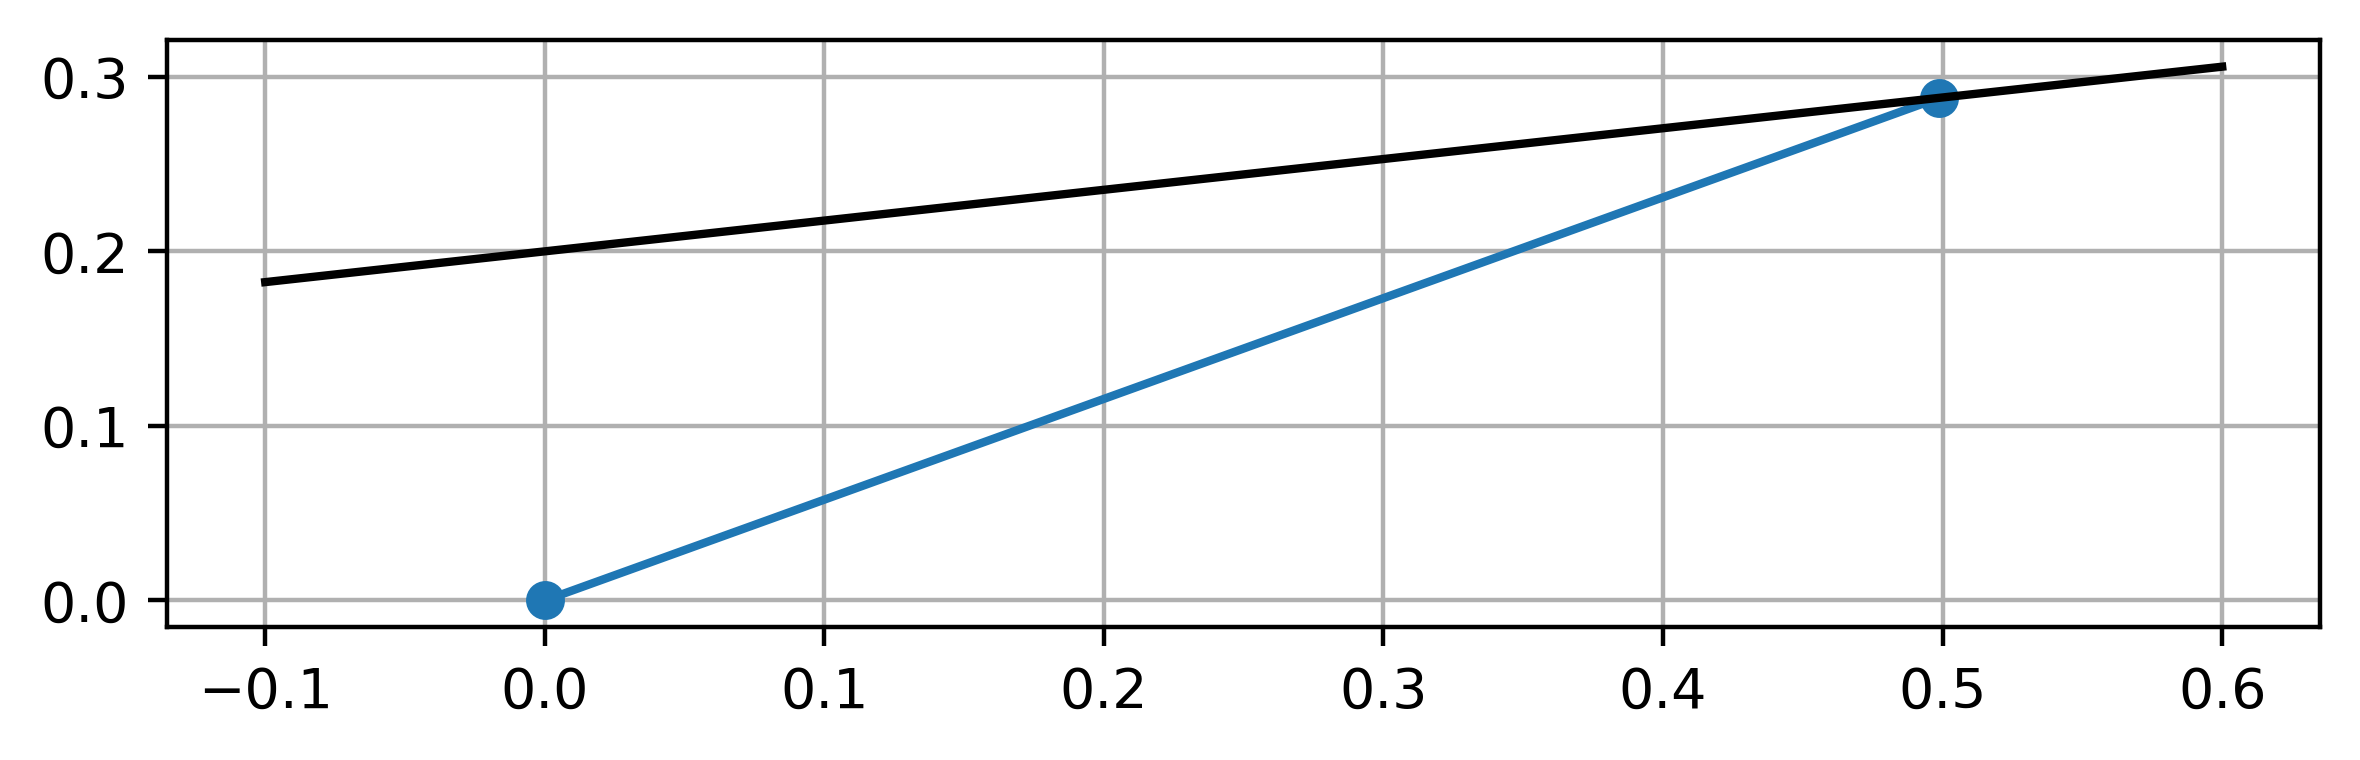

In [176]:
dydx_02 = np.tan(theta_2)
dydx_plus = np.tan(theta_1 + get_mach_angle(M_1))

y0 = 0.2
x0 = 0
y1 = 0
x1 = 0

x2 = (y0 - y1 - x0*dydx_02 + x1*dydx_plus) / (dydx_plus - dydx_02)
y2 = y0 + (x2 - x0) * dydx_02

plt.subplots(figsize=(6, 2))

# construct line for wall
xs = np.linspace(-0.1, 0.6, 50, endpoint=True)
ys = y0 + np.tan(theta_2) * (xs - x0)

plt.plot([x1, x2], [y1, y2], '-o')
plt.plot(xs, ys, 'k')

plt.grid(True)
plt.tight_layout()
plt.show()

### Example: diverging channel

Consider a situation where uniform radial flow at Mach 2.0 enters a two-dimensional diverging channel with straight walls. Compute the variation of Mach number in this radial flow field, assuming isentropic, steady flow. The walls are inclined at a total angle of 12° and $\gamma = 1.4$.

**Solution:** We can take advantage of the symmetry of this problem and only solve for half the flow field, with the line of symmetry being treated as a horizontal wall. Then, the physical wall moves upward at an angle of 6°.

We choose a number of initial data points where the Mach number is 2.0. Since the flow is radial, the flow direction varies smoothly from 0° to 6°.
Once we have this initial data line, we can proceed using the unit processes given above, 
treating the line of symmetry as a horizontal wall.

To find the coordinates of these initial points, we consider that the initial data line is an arc with length $R \Delta \theta$, where $\Delta \theta$ is the 6° angle of the half-channel.
The upper wall is given by a line following

$$ y = x \tan \theta \;, $$

and we can fix the initial point (on the wall) with coordinate $y_0 = 1$.
Then, $x_0 = 1 / \tan \Delta \theta$, and the radius of this arc is given by

$$ R = \sqrt{ x_0^2 + y_0^2 } \;. $$

The remaining points on the initial data line can be found with 
$ x = R \cos \theta $ and $ y = R \sin \theta $, and the remaining grid points
throughout the flow field can be found using the equations given above.

In [170]:
gamma = 1.4
wall_angle = 6 * np.pi / 180

# initial data line
M_initial = 2.0
num_initial = 4

num_columns = 5

num_points = (
    num_initial * num_columns +
    (num_initial - 1) * (num_columns - 1)
    )

thetas = np.zeros(num_points)
machs = np.zeros(num_points)
nus = np.zeros(num_points)
ys = np.zeros(num_points)
xs = np.zeros(num_points)

kplus = np.zeros(num_initial - 1)
kminus = np.zeros(num_initial - 1)

# initial line
delta_theta = wall_angle / (num_initial - 1)
thetas[:num_initial] = [
    wall_angle - delta_theta * idx for idx in range(num_initial)
    ]
machs[:num_initial] = M_initial
nus[:num_initial] = get_prandtl_meyer(machs[:num_initial], gamma)

# initial data line (arc)
ys[0] = 1.0
xs[0] = 1 / np.tan(wall_angle)
radius_initial = np.sqrt(xs[0]**2 + ys[0]**2)
xs[1:num_initial] = radius_initial * np.cos(thetas[1:num_initial])
ys[1:num_initial] = radius_initial * np.sin(thetas[1:num_initial])

# calculate characteristic
for idx in range(num_initial - 1):
    kminus[idx] = thetas[idx] + get_prandtl_meyer(machs[idx], gamma)
    kplus[idx] = thetas[idx+1] - get_prandtl_meyer(machs[idx+1], gamma)

# next column
for idx in range(num_initial - 1):
    thetas[num_initial + idx] = 0.5 * (kminus[idx] + kplus[idx])
    nus[num_initial + idx] = 0.5 * (kminus[idx] - kplus[idx])
    root = root_scalar(
        solve_prandtl_meyer, x0=2.0, x1=3.0, 
        args=(nus[num_initial + idx], gamma)
        )
    machs[num_initial + idx] = root.root
    mu = get_mach_angle(machs[num_initial + idx])
    
    dydx_minus = np.tan(0.5*(
        thetas[idx] + thetas[num_initial + idx] - 
        get_mach_angle(machs[idx]) - mu
        ))
    dydx_plus = np.tan(0.5*(
        thetas[idx + 1] + thetas[num_initial + idx] + 
        get_mach_angle(machs[idx + 1]) + mu
        ))
    
    xs[num_initial + idx] = (
        ys[idx+1] - ys[idx] - 
        xs[idx+1] * dydx_plus + 
        xs[idx] * dydx_minus
        ) / (dydx_minus - dydx_plus)
    ys[num_initial + idx] = (
        ys[idx] + 
        (xs[num_initial + idx] - xs[idx])*dydx_minus
        )
    
# remaining 
for icol in range(1, num_columns):
    idx_start = icol * (2*num_initial - 1)

    for idx in range(num_initial):
        # wall point
        if idx == 0:
            thetas[idx_start + idx] = wall_angle
            nus[idx_start + idx] = (
                nus[idx_start + idx - num_initial + 1] + 
                wall_angle - thetas[idx_start + idx - num_initial + 1]
                )
            root = root_scalar(
                solve_prandtl_meyer, x0=2.0, x1=3.0, 
                args=(nus[idx_start + idx], gamma)
                )
            machs[idx_start + idx] = root.root
            mu = get_mach_angle(machs[idx_start + idx])
            
            dydx_plus = np.tan(0.5*(
                thetas[idx_start + idx - num_initial + 1] + 
                thetas[idx_start + idx] + 
                get_mach_angle(machs[idx_start + idx - num_initial + 1]) + mu
                ))
            
            x1 = xs[idx_start + idx - num_initial + 1]
            y1 = ys[idx_start + idx - num_initial + 1]
            
            x0 = x1
            y0 = ys[0] + (x0 - xs[0]) * np.tan(wall_angle)

            xs[idx_start + idx] = (
                y0 - y1 - x0*np.tan(wall_angle) + x1*dydx_plus
                ) / (dydx_plus - np.tan(wall_angle))
            ys[idx_start + idx] = (
                y0 + (xs[idx_start + idx] - x0) * np.tan(wall_angle)
                )
        # point on line of symmetry
        elif idx == num_initial - 1:
            thetas[idx_start + idx] = 0
            nus[idx_start + idx] = (
                nus[idx_start + idx - num_initial] + 
                thetas[idx_start + idx - num_initial]
                )
            root = root_scalar(
                solve_prandtl_meyer, x0=2.0, x1=3.0, 
                args=(nus[idx_start + idx], gamma)
                )
            machs[idx_start + idx] = root.root
            mu = get_mach_angle(machs[idx_start + idx])
            
            dydx_minus = np.tan(0.5*(
                thetas[idx_start + idx - num_initial] +
                thetas[idx_start + idx] -
                get_mach_angle(machs[idx_start + idx - num_initial]) - mu
                ))
            
            x1 = xs[idx_start + idx - num_initial]
            y1 = ys[idx_start + idx - num_initial]
            
            xs[idx_start + idx] = (
                x1 - y1 / dydx_minus
                )
            ys[idx_start + idx] = 0
        # interior point
        else:
            thetas[idx_start + idx] = 0.5 * (kminus[idx-1] + kplus[idx])
            nus[idx_start + idx] = 0.5 * (kminus[idx-1] - kplus[idx])
            root = root_scalar(
                solve_prandtl_meyer, x0=2.0, x1=3.0, 
                args=(nus[idx_start + idx], gamma)
                )
            machs[idx_start + idx] = root.root
            mu = get_mach_angle(machs[idx_start + idx])
            
            dydx_minus = np.tan(0.5*(
                thetas[idx_start + idx - num_initial] + 
                thetas[idx_start + idx] - 
                get_mach_angle(machs[idx_start + idx - num_initial]) - mu
                ))
            dydx_plus = np.tan(0.5*(
                thetas[idx_start + idx - num_initial + 1] + 
                thetas[idx_start + idx] + 
                get_mach_angle(machs[idx_start + idx - num_initial + 1]) + mu
                ))

            xs[idx_start + idx] = (
                ys[idx_start + idx - num_initial + 1] - 
                ys[idx_start + idx - num_initial] - 
                xs[idx_start + idx - num_initial + 1]*dydx_plus + 
                xs[idx_start + idx - num_initial]*dydx_minus
                ) / (dydx_minus - dydx_plus)
            ys[idx_start + idx] = (
                ys[idx_start + idx - num_initial] + 
                (xs[idx_start + idx] - xs[idx_start + idx - num_initial])*dydx_minus
                )

    # new characteristic constants
    kminus[1:] = kminus[:-1]
    kminus[0] = thetas[idx_start] + nus[idx_start]
    kplus[:-1] = kplus[1:]
    kplus[-1] = (
        thetas[idx_start + num_initial - 1] - 
        nus[idx_start + num_initial - 1]
        )
    
    idx_start += num_initial
    if icol < num_columns - 1:
        for idx in range(num_initial - 1):
            thetas[idx_start + idx] = 0.5 * (kminus[idx] + kplus[idx])
            nus[idx_start + idx] = 0.5 * (kminus[idx] - kplus[idx])
            root = root_scalar(
                solve_prandtl_meyer, x0=2.0, x1=3.0, 
                args=(nus[idx_start + idx], gamma)
                )
            machs[idx_start + idx] = root.root
            mu = get_mach_angle(machs[idx_start + idx])
            
            dydx_minus = np.tan(0.5*(
                thetas[idx_start + idx - num_initial] + 
                thetas[num_initial + idx] - 
                get_mach_angle(machs[idx_start + idx - num_initial]) - mu
                ))
            dydx_plus = np.tan(0.5*(
                thetas[idx_start + idx - num_initial + 1] + 
                thetas[idx_start + idx] + 
                get_mach_angle(machs[idx_start + idx - num_initial + 1]) + mu
                ))

            xs[idx_start + idx] = (
                ys[idx_start + idx - num_initial + 1] - 
                ys[idx_start + idx - num_initial] - 
                xs[idx_start + idx - num_initial + 1]*dydx_plus + 
                xs[idx_start + idx - num_initial]*dydx_minus
                ) / (dydx_minus - dydx_plus)
            ys[idx_start + idx] = (
                ys[idx_start + idx - num_initial] + 
                (xs[idx_start+idx] - xs[idx_start + idx - num_initial])*dydx_minus
                )

We can examine the flow properties at each location, and visualize the characteristic grid network.

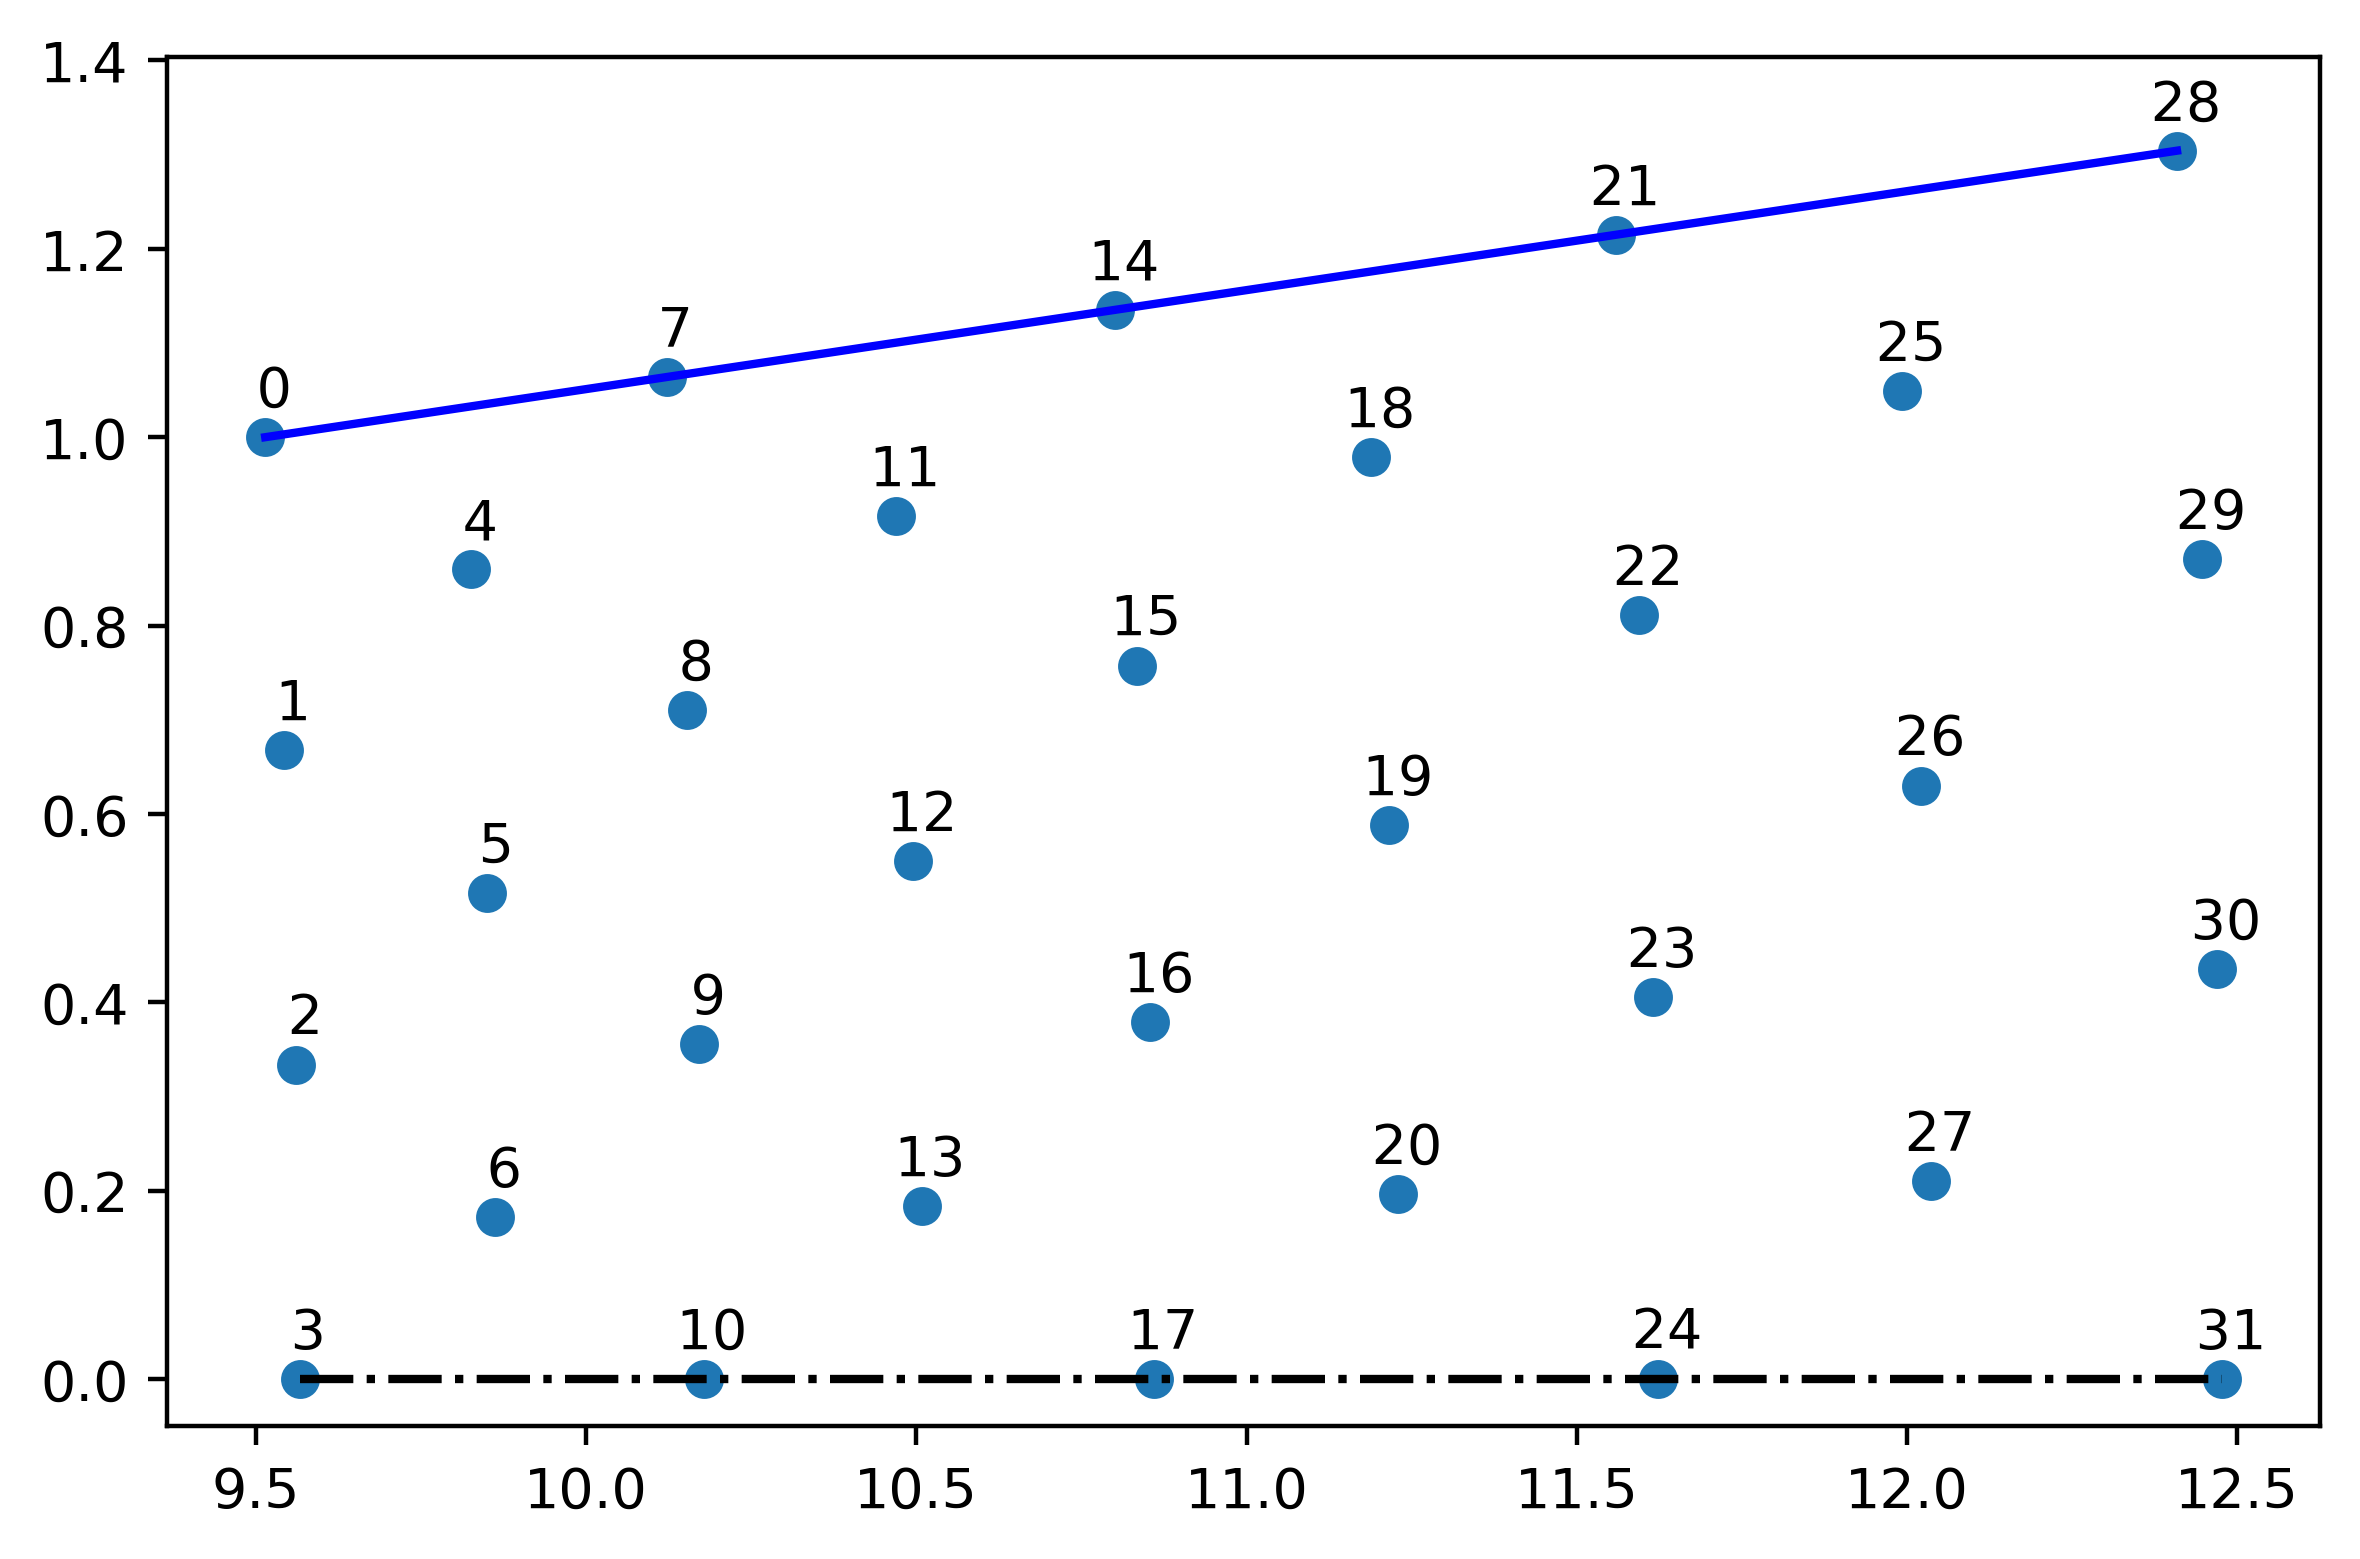

In [173]:
plt.plot(xs, ys, 'o')

plt.plot(
    [xs[num_initial-1], xs[-1]], 
    [ys[num_initial-1], ys[-1]], '-.k'
    )
plt.plot(
    [xs[0], xs[-num_initial]], [ys[0], ys[-num_initial]], '-b', 
    )

for idx, (x,y) in enumerate(zip(xs, ys)):
    plt.text(
        x, y + 0.02, f'{idx: d}', 
        verticalalignment='bottom', horizontalalignment='center'
        )
plt.ylim([-0.05, np.max(ys)+0.1])

plt.tight_layout()
plt.show()

In [155]:
print('id   Mach     angle (°)')
for idx, (mach, theta) in enumerate(zip(machs, thetas)):
    print(f'{idx: d}  {mach: .4f}  {theta*180/np.pi: .3f}')

id   Mach     angle (°)
 0   2.0000   6.000
 1   2.0000   4.000
 2   2.0000   2.000
 3   2.0000  -0.000
 4   2.0365   5.000
 5   2.0365   3.000
 6   2.0365   1.000
 7   2.0733   6.000
 8   2.0733   4.000
 9   2.0733   2.000
 10   2.0733   0.000
 11   2.1106   5.000
 12   2.1106   3.000
 13   2.1106   1.000
 14   2.1483   6.000
 15   2.1483   4.000
 16   2.1483   2.000
 17   2.1483   0.000
 18   2.1864   5.000
 19   2.1864   3.000
 20   2.1864   1.000
 21   2.2251   6.000
 22   2.2251   4.000
 23   2.2251   2.000
 24   2.2251   0.000
 25   2.2642   5.000
 26   2.2642   3.000
 27   2.2642   1.000
 28   2.3039   6.000
 29   2.3039   4.000
 30   2.3039   2.000
 31   2.3039   0.000


We can compare the results of the two-dimensional method of characteristics solution against  the exact solution determined using our one-dimensional methods, using the reference area ratio.

Based on the known Mach and gas property at the entrance, we can calculate

$$ \frac{A_{\text{in}, y=0}}{A^*} = f(M_{\text{in}}, \gamma) $$

and then use area ratios at the exit:

$$
\frac{A_{\text{out}, y=0}}{A^*} = \frac{A_{\text{out}, y=0}}{A_{\text{in}, y=0}} \frac{A_{\text{in}, y=0}}{A^*} = \frac{R_{\text{out}, y=0} \Delta \theta}{R_{\text{in}, y=0} \Delta \theta} \frac{A_{\text{in}, y=0}}{A^*} = \frac{x_{\text{out}, y=0} \Delta \theta}{x_{\text{in}, y=0} \Delta \theta} \frac{A_{\text{in}, y=0}}{A^*} = f(M_{\text{out}}, \gamma) \;,
$$

where we are exploiting the radial flow condition.

In [135]:
area_ratio_in = get_reference_area(machs[num_initial-1], gamma)

# find Mach number from one-dimensional exact solution
area_ratio_exit = (xs[-1] / xs[num_initial-1]) * area_ratio_in
root = root_scalar(
    solve_mach_area, x0=2.0, x1=2.5, args=(area_ratio_exit, gamma)
    )
M_exact = root.root

print(f'M_exit (exact) = {M_exact: .5f}')
print(f'M_exit (exact) = {machs[-1]: .5f}')
print(f'Error: {100*np.abs(M_exact - machs[-1])/M_exact: .3e} %')

M_exit (exact) =  2.30388
M_exit (exact) =  2.30387
Error:  4.018e-04 %


The method of characteristics solution matches the exact solution quite closely, even though we used a fairly course mesh.